# **Análise da Pegada de Carbono: Brasil e Comparações Globais**

Este projeto tem como objetivo analisar a pegada de carbono (carbon footprint) do Brasil e compará-la com diferentes contextos globais e regionais, incluindo o Continente Americano, a OCDE e os Estados Unidos. Utilizamos ferramentas de ciência de dados, estatística descritiva e aprendizado de máquina (ML) para identificar padrões, realizar previsões e responder a questões avançadas relacionadas às emissões de carbono. Além disso, integramos dados de fontes confiáveis e enriquecemos o dataset utilizando APIs públicas, promovendo uma análise robusta e detalhada.

## **Nomes dos Alunos**
- Gustavo Kenzo - RM 98481
- Vitor Shimizu - RM 550390
- Ian - RM 98387

---

### **Estrutura do Notebook**
1. **Ask**: Definição de perguntas de pesquisa e escopo.
2. **Get**: Coleta e integração de dados de múltiplas fontes confiáveis.
3. **Explore**: Limpeza, análise exploratória e combinação de dados.
4. **Model**: Modelagem com aprendizado de máquina, comparando algoritmos de regressão e classificação.
5. **Communicate**: Apresentação dos resultados em gráficos e tabelas, com explicações detalhadas e conclusões gerais.

---

### **Bibliotecas Utilizadas**
- `pandas`
- `numpy`
- `matplotlib`
- `seaborn`
- `scikit-learn`

---

### **Instruções para Execução**
Certifique-se de que todas as bibliotecas necessárias estão instaladas. Para executar este notebook:
1. Instale as dependências utilizando `pip install -r requirements.txt`.
2. Execute as células sequencialmente para reproduzir os resultados.

# **Etapa 1: Ask (Perguntas de Pesquisa)**

As perguntas de pesquisa definidas para este projeto são as seguintes:

1. Análise Comparativa: Consumo de Energia Renovável e Pegada de Carbono (Brasil vs OCDE)
2. Como as emissões de carbono per capita do Brasil se comparam à média dos países da OCDE entre os anos de 2013 e 2018?
3. Qual é a classificação das emissões totais de carbono entre Brasil, EUA, continente americano, OCDE, e mundo, identificando os maiores e menores emissores?
4. Qual é a tendência da pegada de carbono total do Brasil nos últimos 10 anos?
5. Como a pegada de carbono do Brasil se compara à média global ao longo dos últimos anos?
6. Como estão distribuídas as emissões de carbono per capita entre os países da OCDE?
7. Com base em dados históricos, qual é a previsão de pegada de carbono do Brasil para os próximos 10 anos?
8. Como as emissões de carbono do Brasil se relacionam com as emissões médias da OCDE ao longo dos anos?
9. As emissões do Brasil são mais próximas às dos EUA ou da média global?
10. Qual é a relação entre o consumo de energia eólica e as emissões de carbono per capita nos países da OCDE?


Instalação das bibliotecas necessárias



In [2]:
import requests
import pandas as pd
import time

Configurações da API

In [3]:
API_KEY = "36cc67bc5d3944cabed110537242011"
BASE_URL = "http://api.weatherapi.com/v1/current.json"

Função para obter dados climáticos atuais


In [4]:
def get_current_weather(location):
    params = {
        "key": API_KEY,
        "q": location
    }
    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Erro na requisição para {location}: {response.status_code}")
        return None

# Lista de países de interesse (exemplo para Continente Americano)
countries = ["Brazil", "Argentina", "Canada", "Mexico", "Chile", "Colombia", "Peru", "Venezuela", "Ecuador"]

# Coletar dados para cada país
weather_data = []
for country in countries:
    data = get_current_weather(country)
    if data:
        weather_info = {
            "Country": country,
            "Temperature (°C)": data['current']['temp_c'],
            "Humidity (%)": data['current']['humidity'],
            "Precipitation (mm)": data['current']['precip_mm'],
            "Wind (kph)": data['current']['wind_kph'],
            "Condition": data['current']['condition']['text']
        }
        weather_data.append(weather_info)
    # Respeitar limites de taxa da API
    time.sleep(1)  # Pausa de 1 segundo entre as requisições

Converter para DataFrame

In [5]:
weather_df = pd.DataFrame(weather_data)

Mostrar o DataFrame


In [6]:
from IPython.display import display
display(weather_df)

,Country,Temperature (°C),Humidity (%),Precipitation (mm),Wind (kph),Condition
0,Brazil,23.3,76,0.64,3.6,Patchy rain nearby
1,Argentina,19.2,83,0.00,7.2,Sunny
2,Canada,5.3,100,4.36,25.6,Light rain
3,Mexico,8.4,87,0.00,6.8,Clear
4,Chile,15.7,51,0.00,4.0,Sunny
5,Colombia,13.0,100,0.07,3.6,Partly cloudy
6,Peru,17.8,84,0.00,13.0,Overcast
7,Venezuela,17.8,92,0.00,3.6,Clear
8,Ecuador,10.9,92,0.14,3.6,Patchy rain nearby


Visualização 1: Gráfico de barras para temperatura

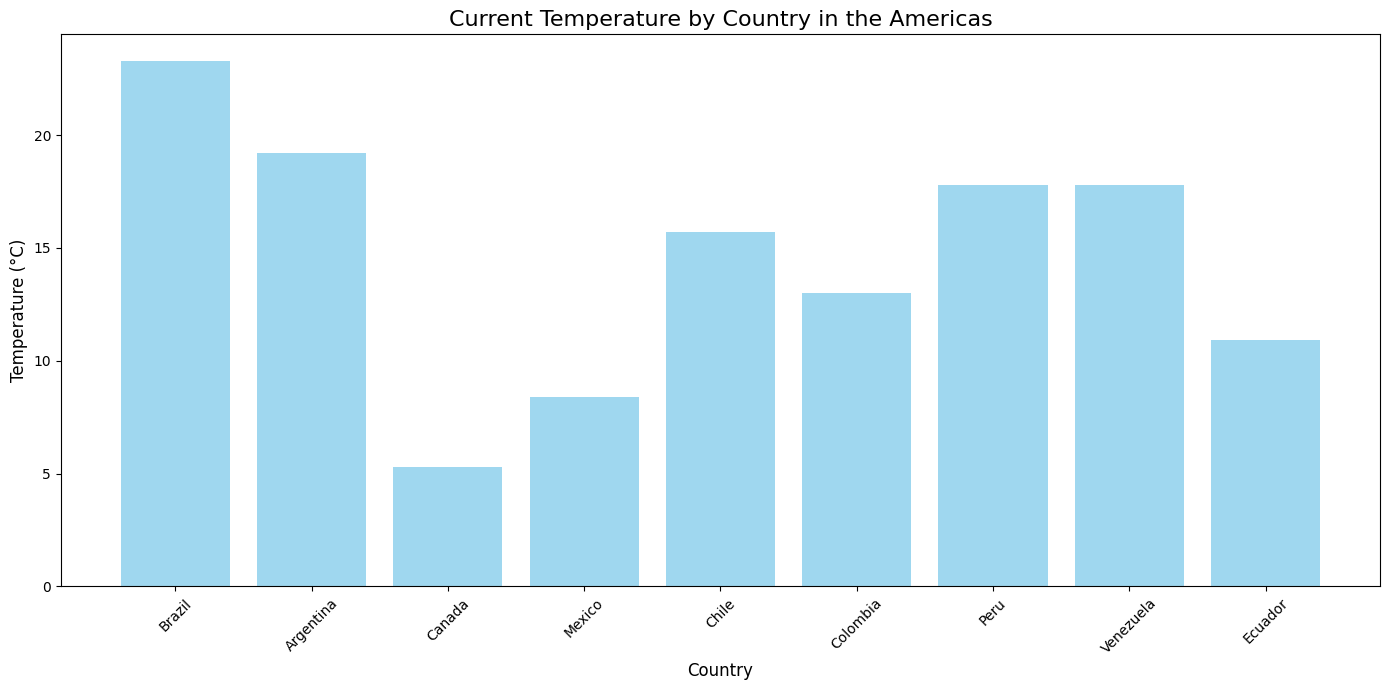

In [9]:
import matplotlib.pyplot as plt #Importar bibliotecas necessárias

plt.figure(figsize=(14, 7))
plt.bar(weather_df['Country'], weather_df['Temperature (°C)'], color='skyblue', alpha=0.8)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Current Temperature by Country in the Americas', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Visualização 2: Gráfico de pizza para condições climáticas

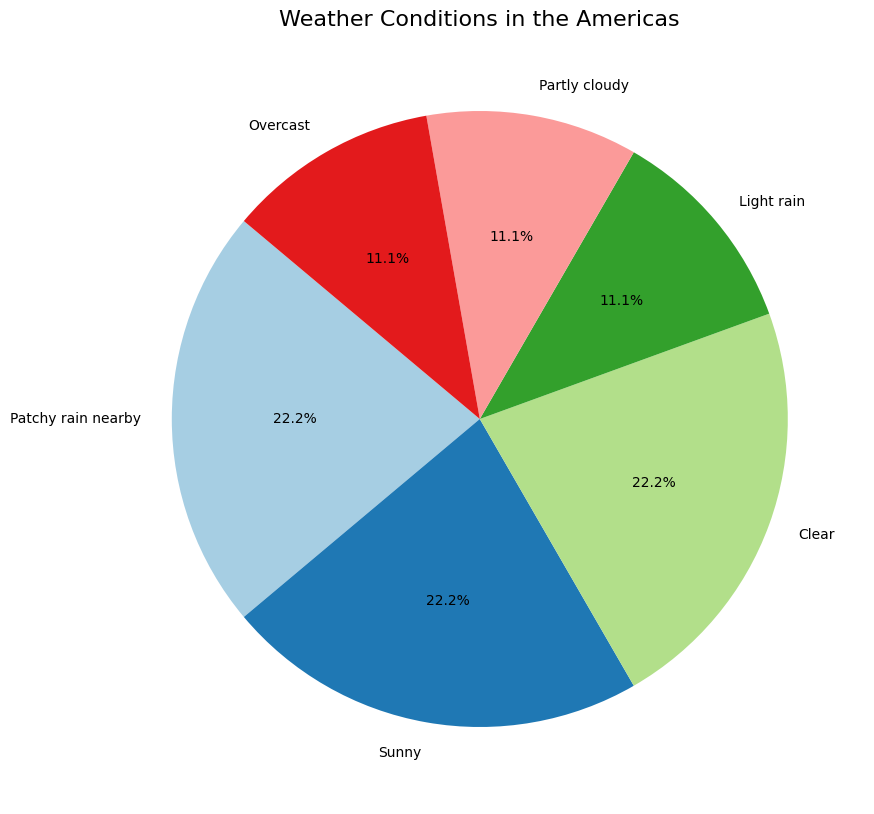

In [10]:
condition_counts = weather_df['Condition'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(condition_counts))))
plt.title('Weather Conditions in the Americas', fontsize=16)
plt.show()

Calcular as médias para o continente Americano

In [11]:
americas_avg = weather_df.mean(numeric_only=True)

Converter as médias para um DataFrame para exibição

In [12]:
averages_df = americas_avg.reset_index()
averages_df.columns = ["Metric", "Average"]

Exibir as médias

In [13]:
print("Médias para o Continente Americano:")
display(averages_df)

Médias para o Continente Americano:


,Metric,Average
0,Temperature (°C),14.600000
1,Humidity (%),85.000000
2,Precipitation (mm),0.578889
3,Wind (kph),7.888889


Lista de países membros da OCDE

In [14]:
oecd_countries = [
    "Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
    "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece",
    "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", "Korea", "Latvia",
    "Lithuania", "Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway",
    "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden",
    "Switzerland", "Turkey", "United Kingdom", "United States"
]

Função para coletar dados climáticos de um país

In [15]:
def get_current_weather(country):
    params = {
        "key": API_KEY,
        "q": country
    }
    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Erro ao buscar dados de {country}: {response.status_code}")
        return None

Coletar dados para todos os países da OCDE

In [16]:
weather_data = []
for country in oecd_countries:
    data = get_current_weather(country)
    if data:
        weather_info = {
            "Country": country,
            "Temperature (°C)": data['current']['temp_c'],
            "Humidity (%)": data['current']['humidity'],
            "Precipitation (mm)": data['current']['precip_mm'],
            "Wind (kph)": data['current']['wind_kph'],
            "Condition": data['current']['condition']['text']
        }
        weather_data.append(weather_info)
    time.sleep(1)  # Respeitar os limites de taxa da API gratuita

Converter para DataFrame

In [17]:
weather_df = pd.DataFrame(weather_data)

Mostrar o DataFrame

In [18]:
from IPython.display import display
display(weather_df)

,Country,Temperature (°C),Humidity (%),Precipitation (mm),Wind (kph),Condition
0,Australia,19.3,52,0.00,7.2,Clear
1,Austria,3.3,60,0.00,22.3,Partly cloudy
2,Belgium,2.2,80,0.06,26.3,Moderate or heavy snow showers
3,Canada,5.3,100,4.36,25.6,Light rain
4,Chile,15.7,51,0.00,4.0,Sunny
5,Colombia,13.0,100,0.11,3.6,Partly cloudy
6,Costa Rica,14.0,96,0.00,6.8,Mist
7,Czech Republic,0.2,74,0.01,25.2,Light snow
8,Denmark,1.2,75,0.00,10.8,Overcast
9,Estonia,-1.0,80,0.15,26.6,Light snow


Gráfico de barras para temperatura

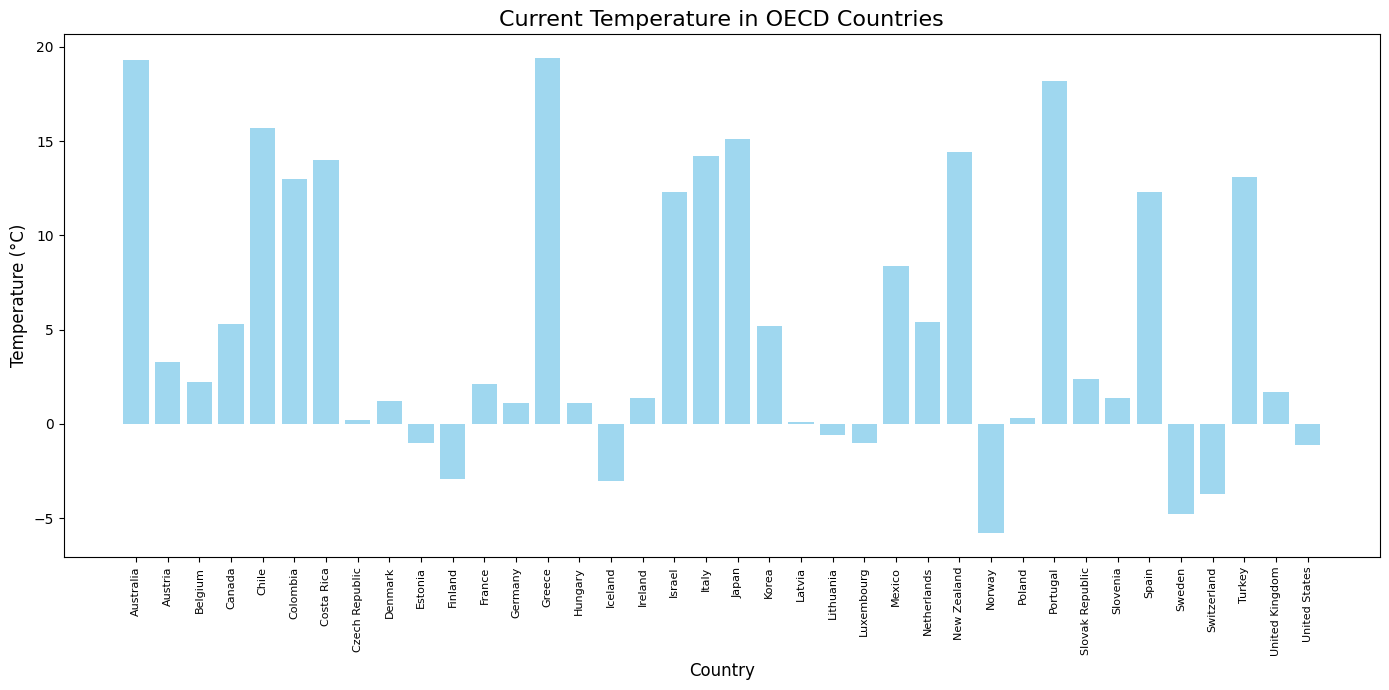

In [19]:
plt.figure(figsize=(14, 7))
plt.bar(weather_df['Country'], weather_df['Temperature (°C)'], color='skyblue', alpha=0.8)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Current Temperature in OECD Countries', fontsize=16)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

Coletar dados do Brasil e EUA

In [20]:
brazil_weather = get_current_weather("Brazil")
usa_weather = get_current_weather("United States")

Criar DataFrames

In [21]:
brazil_weather_df = pd.DataFrame([brazil_weather])
usa_weather_df = pd.DataFrame([usa_weather])

Carregar os arquivos CSV

In [22]:
carbon_data = pd.read_csv("carbon_data.csv")
world_energy_consumption = pd.read_csv("world_energy_consumption.csv")

Verificar e exibir valores nulos no dataset de emissões de carbono


In [23]:
print("Valores nulos em carbon_data:")
print(carbon_data.isnull().sum())

Valores nulos em carbon_data:
Country Name       0
country_code       0
Region             0
Indicator Name     0
1990              30
1991              29
1992              26
1993              26
1994              26
1995              25
1996              25
1997              25
1998              26
1999              26
2000              25
2001              25
2002              24
2003              24
2004              24
2005              24
2006              24
2007              24
2008              24
2009              24
2010              24
2011              24
2012              24
2013              24
2014              24
2015              24
2016              24
2017              24
2018              24
2019              24
2019.1            24
dtype: int64


Remover linhas com valores nulos em carbon_data

In [24]:
carbon_data_cleaned = carbon_data.dropna()

Verificar e exibir valores nulos no dataset de consumo de energia

In [25]:
print("\nValores nulos em world_energy_consumption:")
print(world_energy_consumption.isnull().sum())


Valores nulos em world_energy_consumption:
country                       0
year                          0
iso_code                   5500
population                 3889
gdp                       10899
                          ...  
wind_elec_per_capita      14947
wind_electricity          14016
wind_energy_per_capita    17947
wind_share_elec           15126
wind_share_energy         17911
Length: 129, dtype: int64


Remover linhas com valores nulos em world_energy_consumption

In [26]:
world_energy_consumption_cleaned = world_energy_consumption.dropna()

Resumo após a limpeza

In [27]:
print("\nResumo do dataset carbon_data_cleaned:")
print(carbon_data_cleaned.info())
carbon_data_cleaned.head()

print("\nResumo do dataset world_energy_consumption_cleaned:")
print(world_energy_consumption_cleaned.info())
world_energy_consumption_cleaned.head()


Resumo do dataset carbon_data_cleaned:
<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 214
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    183 non-null    object 
 1   country_code    183 non-null    object 
 2   Region          183 non-null    object 
 3   Indicator Name  183 non-null    object 
 4   1990            183 non-null    float64
 5   1991            183 non-null    float64
 6   1992            183 non-null    float64
 7   1993            183 non-null    float64
 8   1994            183 non-null    float64
 9   1995            183 non-null    float64
 10  1996            183 non-null    float64
 11  1997            183 non-null    float64
 12  1998            183 non-null    float64
 13  1999            183 non-null    float64
 14  2000            183 non-null    float64
 15  2001            183 non-null    float64
 16  2002            183 non-null    float64
 17  

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,19.876,1.724,247.831,10.397,33.133,...,0.008,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,14.478,1.505,280.795,11.902,35.387,...,0.008,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,16.710,1.989,324.379,13.891,32.692,...,0.015,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160


Converter a lista para DataFrame

In [28]:
weather_df = pd.DataFrame(weather_data)

Verificar valores nulos

In [29]:
null_values = weather_df.isnull().sum()
display(null_values)

,0
Country,0
Temperature (°C),0
Humidity (%),0
Precipitation (mm),0
Wind (kph),0
Condition,0


Remover linhas com valores nulos

In [30]:
weather_df_cleaned = weather_df.dropna()

print("\nDados sem valores nulos (removidos):")
weather_df_cleaned.head()


Dados sem valores nulos (removidos):


,Country,Temperature (°C),Humidity (%),Precipitation (mm),Wind (kph),Condition
0,Australia,19.3,52,0.00,7.2,Clear
1,Austria,3.3,60,0.00,22.3,Partly cloudy
2,Belgium,2.2,80,0.06,26.3,Moderate or heavy snow showers
3,Canada,5.3,100,4.36,25.6,Light rain
4,Chile,15.7,51,0.00,4.0,Sunny


Verificar colunas em todos os datasets

In [31]:
print("Colunas em carbon_data_cleaned:", carbon_data_cleaned.columns)
print("Colunas em world_energy_consumption_cleaned:", world_energy_consumption_cleaned.columns)
print("Colunas em weather_df_cleaned:", weather_df_cleaned.columns)

Colunas em carbon_data_cleaned: Index(['Country Name', 'country_code', 'Region', 'Indicator Name', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2019.1'],
      dtype='object')
Colunas em world_energy_consumption_cleaned: Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)
Colunas em weather_df_cleaned: Index(['Country', '

Renomear colunas, se necessário

In [32]:
if 'location' in weather_df_cleaned.columns:
    weather_df_cleaned.rename(columns={'location': 'country'}, inplace=True)

Transformar colunas de anos em uma única coluna 'year'



In [33]:
carbon_data_cleaned_long = pd.melt(
    carbon_data_cleaned,
    id_vars=['Country Name', 'country_code', 'Region', 'Indicator Name'],
    var_name='year',
    value_name='value'
)

Converter a nova coluna 'year' para numérica

In [34]:
carbon_data_cleaned_long['year'] = pd.to_numeric(carbon_data_cleaned_long['year'], errors='coerce')

Exibir o DataFrame transformado

In [35]:
print("\nDados transformados (carbon_data_cleaned_long):")
carbon_data_cleaned_long.head()


Dados transformados (carbon_data_cleaned_long):


,Country Name,country_code,Region,Indicator Name,year,value
0,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),1990.0,0.191745
1,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),1990.0,0.553662
2,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita),1990.0,1.819542
3,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita),1990.0,7.521832
4,United Arab Emirates,ARE,Middle East & North Africa,CO2 emissions (metric tons per capita),1990.0,30.195189


Converter 'year' para inteiro

In [36]:
carbon_data_cleaned_long.loc[:, 'year'] = carbon_data_cleaned_long['year'].astype(int)
world_energy_consumption_cleaned.loc[:, 'year'] = world_energy_consumption_cleaned['year'].astype(int)

Renomear a coluna 'Country Name' para 'country' em carbon_data_cleaned_long

In [37]:
carbon_data_cleaned_long.rename(columns={"Country Name": "country"}, inplace=True)

Realizar o merge

In [38]:
combined_data = pd.merge(
    carbon_data_cleaned_long,
    world_energy_consumption_cleaned,
    on=["country", "year"],
    how="inner"
)

Renomear a coluna

In [39]:
weather_df_cleaned.rename(columns={"Country": "country"}, inplace=True)

Merge com weather_df_cleaned

In [40]:
final_data = pd.merge(
    combined_data,
    weather_df_cleaned,
    on="country",
    how="outer"
)

print("\nDados combinados (final_data):")
final_data.head()


Dados combinados (final_data):


,country,country_code,Region,Indicator Name,year,value,iso_code,population,gdp,biofuel_cons_change_pct,...,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,Temperature (°C),Humidity (%),Precipitation (mm),Wind (kph),Condition
0,Argentina,ARG,Latin America & Caribbean,CO2 emissions (metric tons per capita),2011.0,4.280989,ARG,41520736.0,8.359705e+11,46.423,...,1.445,0.06,1.767,0.049,0.008,NaN,NaN,NaN,NaN,NaN
1,Argentina,ARG,Latin America & Caribbean,CO2 emissions (metric tons per capita),2012.0,4.264224,ARG,41952364.0,8.274048e+11,19.876,...,19.546,0.82,24.174,0.637,0.107,NaN,NaN,NaN,NaN,NaN
2,Argentina,ARG,Latin America & Caribbean,CO2 emissions (metric tons per capita),2013.0,4.342115,ARG,42388268.0,8.473051e+11,14.478,...,23.827,1.01,29.149,0.763,0.126,NaN,NaN,NaN,NaN,NaN
3,Argentina,ARG,Latin America & Caribbean,CO2 emissions (metric tons per capita),2014.0,4.209096,ARG,42824064.0,8.259815e+11,16.710,...,14.478,0.62,39.190,0.470,0.171,NaN,NaN,NaN,NaN,NaN
4,Argentina,ARG,Latin America & Caribbean,CO2 emissions (metric tons per capita),2015.0,4.301914,ARG,43257064.0,8.478550e+11,8.925,...,13.639,0.59,36.938,0.428,0.160,NaN,NaN,NaN,NaN,NaN


Filtrar os dados para o Brasil

In [41]:
brazil_data = final_data[final_data["country"] == "Brazil"]

Filtrar os dados para os EUA

In [42]:
usa_data = final_data[final_data["country"] == "United States"]

Filtrar os dados para o Continente Americano

In [43]:
continent_american_countries = [
    "Brazil", "Argentina", "Canada", "Mexico", "Chile", "Colombia",
    "Peru", "Venezuela", "Ecuador", "Bolivia", "Paraguay", "Uruguay"
]
american_data = final_data[final_data["country"].isin(continent_american_countries)]

Filtrar os dados para os países da OCDE

In [44]:
oecd_countries = [
    "Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
    "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece",
    "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", "Korea", "Latvia",
    "Lithuania", "Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway",
    "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden",
    "Switzerland", "Turkey", "United Kingdom", "United States"
]
oecd_data = final_data[final_data["country"].isin(oecd_countries)]

Preparar os dados globais (todos os países)

In [45]:
global_data = final_data.copy()

Exibir os exemplos

In [46]:
# Exibir os dados do Brasil
print("\nDados do Brasil:")
brazil_data.head()


Dados do Brasil:


,country,country_code,Region,Indicator Name,year,value,iso_code,population,gdp,biofuel_cons_change_pct,...,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,Temperature (°C),Humidity (%),Precipitation (mm),Wind (kph),Condition
9,Brazil,BRA,Latin America & Caribbean,CO2 emissions (metric tons per capita),2013.0,2.421657,BRA,201721776.0,3.112906e+12,16.904,...,32.619,6.58,88.845,1.168,0.516,NaN,NaN,NaN,NaN,NaN
10,Brazil,BRA,Latin America & Caribbean,CO2 emissions (metric tons per capita),2014.0,2.523232,BRA,203459648.0,3.128573e+12,9.678,...,60.012,12.21,162.581,2.098,0.928,NaN,NaN,NaN,NaN,NaN
11,Brazil,BRA,Latin America & Caribbean,CO2 emissions (metric tons per capita),2015.0,2.373629,BRA,205188208.0,3.270706e+12,16.967,...,104.636,21.47,283.824,3.756,1.656,NaN,NaN,NaN,NaN,NaN
12,Brazil,BRA,Latin America & Caribbean,CO2 emissions (metric tons per capita),2016.0,2.168575,BRA,206859584.0,2.889037e+12,-9.000,...,160.689,33.24,433.390,5.817,2.612,NaN,NaN,NaN,NaN,NaN
13,Brazil,BRA,Latin America & Caribbean,CO2 emissions (metric tons per capita),2017.0,2.196418,BRA,208504960.0,2.926999e+12,2.173,...,201.722,42.06,540.839,7.237,3.256,NaN,NaN,NaN,NaN,NaN


In [47]:
# Exibir os dados do EUA
print("\nDados dos EUA:")
usa_data.head()


Dados dos EUA:


,country,country_code,Region,Indicator Name,year,value,iso_code,population,gdp,biofuel_cons_change_pct,...,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,Temperature (°C),Humidity (%),Precipitation (mm),Wind (kph),Condition
183,United States,USA,North America,CO2 emissions (metric tons per capita),2000.0,20.469807,USA,282398560.0,1.297384e+13,14.606,...,19.795,5.59,59.159,0.147,0.063,-1.1,85.0,0.0,15.1,Overcast
184,United States,USA,North America,CO2 emissions (metric tons per capita),2001.0,20.171531,USA,285470496.0,1.310047e+13,6.239,...,23.610,6.74,70.034,0.181,0.077,-1.1,85.0,0.0,15.1,Overcast
185,United States,USA,North America,CO2 emissions (metric tons per capita),2002.0,19.445549,USA,288350240.0,1.333449e+13,19.461,...,35.894,10.35,105.870,0.269,0.116,-1.1,85.0,0.0,15.1,Overcast
186,United States,USA,North America,CO2 emissions (metric tons per capita),2003.0,19.506499,USA,291109824.0,1.370881e+13,35.669,...,38.439,11.19,112.579,0.289,0.124,-1.1,85.0,0.0,15.1,Overcast
187,United States,USA,North America,CO2 emissions (metric tons per capita),2004.0,19.597631,USA,293947872.0,1.422788e+13,26.232,...,48.104,14.14,140.056,0.358,0.153,-1.1,85.0,0.0,15.1,Overcast


In [48]:
# Exibir os dados do Continente Americano
print("\nDados do Continente Americano:")
american_data.head()


Dados do Continente Americano:


,country,country_code,Region,Indicator Name,year,value,iso_code,population,gdp,biofuel_cons_change_pct,...,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,Temperature (°C),Humidity (%),Precipitation (mm),Wind (kph),Condition
0,Argentina,ARG,Latin America & Caribbean,CO2 emissions (metric tons per capita),2011.0,4.280989,ARG,41520736.0,8.359705e+11,46.423,...,1.445,0.06,1.767,0.049,0.008,NaN,NaN,NaN,NaN,NaN
1,Argentina,ARG,Latin America & Caribbean,CO2 emissions (metric tons per capita),2012.0,4.264224,ARG,41952364.0,8.274048e+11,19.876,...,19.546,0.82,24.174,0.637,0.107,NaN,NaN,NaN,NaN,NaN
2,Argentina,ARG,Latin America & Caribbean,CO2 emissions (metric tons per capita),2013.0,4.342115,ARG,42388268.0,8.473051e+11,14.478,...,23.827,1.01,29.149,0.763,0.126,NaN,NaN,NaN,NaN,NaN
3,Argentina,ARG,Latin America & Caribbean,CO2 emissions (metric tons per capita),2014.0,4.209096,ARG,42824064.0,8.259815e+11,16.710,...,14.478,0.62,39.190,0.470,0.171,NaN,NaN,NaN,NaN,NaN
4,Argentina,ARG,Latin America & Caribbean,CO2 emissions (metric tons per capita),2015.0,4.301914,ARG,43257064.0,8.478550e+11,8.925,...,13.639,0.59,36.938,0.428,0.160,NaN,NaN,NaN,NaN,NaN


In [49]:
# Exibir os dados da OCDE
print("\nDados da OCDE:")
oecd_data.head()


Dados da OCDE:


,country,country_code,Region,Indicator Name,year,value,iso_code,population,gdp,biofuel_cons_change_pct,...,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,Temperature (°C),Humidity (%),Precipitation (mm),Wind (kph),Condition
6,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.3,52.0,0.00,7.2,Clear
7,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.3,60.0,0.00,22.3,Partly cloudy
8,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.2,80.0,0.06,26.3,Moderate or heavy snow showers
22,Canada,CAN,North America,CO2 emissions (metric tons per capita),2000.0,16.757626,CAN,30683316.0,1.138677e+12,7.436,...,8.474,0.26,25.442,0.044,0.021,5.3,100.0,4.36,25.6,Light rain
23,Canada,CAN,North America,CO2 emissions (metric tons per capita),2001.0,16.331569,CAN,31002768.0,1.162073e+12,-0.273,...,10.967,0.34,31.176,0.059,0.027,5.3,100.0,4.36,25.6,Light rain


In [59]:
# Exibir os dados Globais
print("\nDados Globais:")
global_data.head()


Dados Globais:


,country,country_code,Region,Indicator Name,year,value,iso_code,population,gdp,biofuel_cons_change_pct,...,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,Temperature (°C),Humidity (%),Precipitation (mm),Wind (kph),Condition
0,Argentina,ARG,Latin America & Caribbean,CO2 emissions (metric tons per capita),2011.0,4.280989,ARG,41520736.0,8.359705e+11,46.423,...,1.445,0.06,1.767,0.049,0.008,NaN,NaN,NaN,NaN,NaN
1,Argentina,ARG,Latin America & Caribbean,CO2 emissions (metric tons per capita),2012.0,4.264224,ARG,41952364.0,8.274048e+11,19.876,...,19.546,0.82,24.174,0.637,0.107,NaN,NaN,NaN,NaN,NaN
2,Argentina,ARG,Latin America & Caribbean,CO2 emissions (metric tons per capita),2013.0,4.342115,ARG,42388268.0,8.473051e+11,14.478,...,23.827,1.01,29.149,0.763,0.126,NaN,NaN,NaN,NaN,NaN
3,Argentina,ARG,Latin America & Caribbean,CO2 emissions (metric tons per capita),2014.0,4.209096,ARG,42824064.0,8.259815e+11,16.710,...,14.478,0.62,39.190,0.470,0.171,NaN,NaN,NaN,NaN,NaN
4,Argentina,ARG,Latin America & Caribbean,CO2 emissions (metric tons per capita),2015.0,4.301914,ARG,43257064.0,8.478550e+11,8.925,...,13.639,0.59,36.938,0.428,0.160,NaN,NaN,NaN,NaN,NaN


#Oergunta 1: Análise Comparativa: Consumo de Energia Renovável e Pegada de Carbono (Brasil vs OCDE)

### Descrição da Atividade:
Neste gráfico, iremos comparar o **consumo de energia renovável** (energia eólica) e a **pegada de carbono** (toneladas per capita) entre o **Brasil** e a **média da OCDE** ao longo dos anos. O objetivo é analisar como o **uso de fontes renováveis de energia** no Brasil está relacionado à **redução das emissões de carbono**, e como isso se compara aos padrões globais da **OCDE**.

### O que será feito:
- **Análise do Consumo de Energia eólica** (energia renovável) tanto para o Brasil quanto para a média dos países da OCDE, observando as tendências de aumento ao longo dos anos.
- **Avaliação das Pegadas de Carbono** para o Brasil e a OCDE, comparando a evolução das emissões per capita ao longo do tempo.
- **Criação de Gráficos de Comparação** com dois eixos Y: um para o **consumo de energia renovável (em TWh)** e outro para a **pegada de carbono (em toneladas per capita)**.
- **Interpretação** dos resultados para avaliar o impacto do aumento no uso de energia renovável sobre as emissões de carbono e as diferenças entre o Brasil e a OCDE.

Essa análise nos ajudará a entender se o aumento no consumo de fontes de energia renováveis está correlacionado com a redução das emissões de carbono e como o Brasil se posiciona em relação à OCDE neste contexto.

Filtragem dos dados para o Brasil e a OCDE

In [60]:
brazil_data_renewable = brazil_data[['year', 'wind_electricity', 'value']]  # Usando 'wind_electricity' como consumo de energia renovável
oecd_data_renewable = oecd_data[['year', 'wind_electricity', 'value']]  # Usando 'wind_electricity' como consumo de energia renovável

Calcular a média do consumo de energia eólica por ano para a OCDE

In [61]:
oecd_average_carbon = oecd_data.groupby('year')['value'].mean().reset_index()


Cria o gráfico

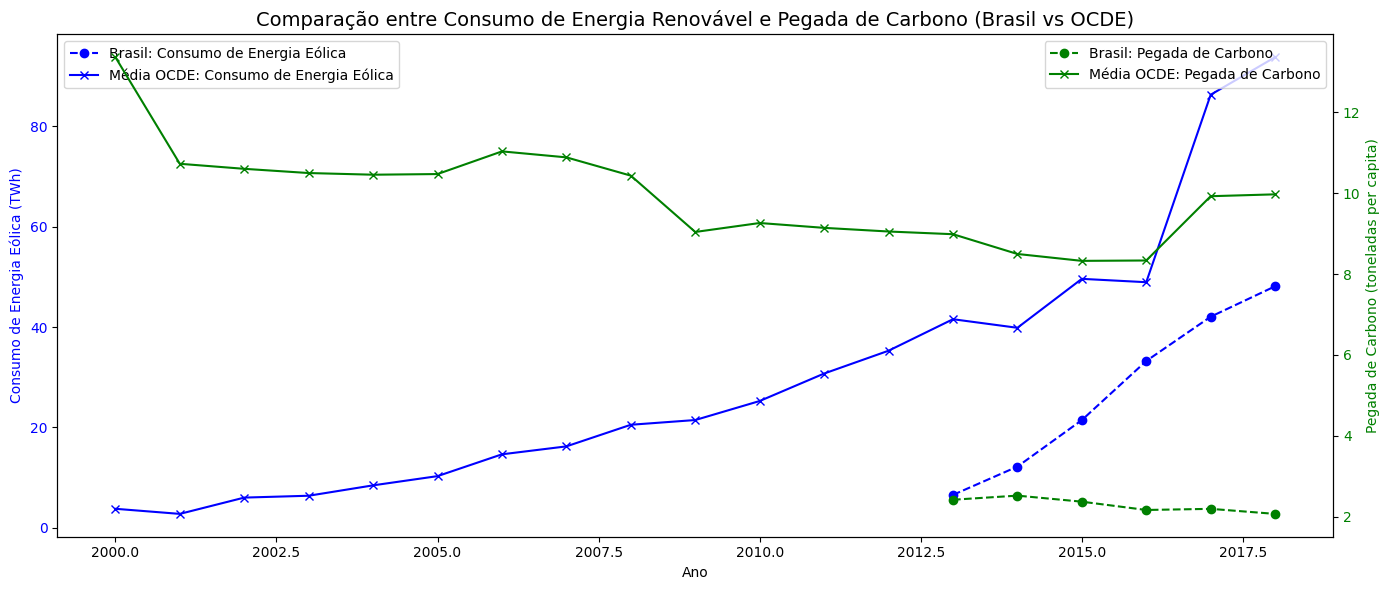

In [63]:
# Criar o gráfico com dois eixos Y
fig, ax1 = plt.subplots(figsize=(14, 6))

# Calcular o consumo médio de eletricidade eólica para a OCDE
oecd_average_wind = oecd_data.groupby('year')['wind_electricity'].mean().reset_index() # Calculando e atribuindo a oecd_average_wind

# Eixo Y para Consumo de Energia Renovável (Eólica)
ax1.set_xlabel('Ano')
ax1.set_ylabel('Consumo de Energia Eólica (TWh)', color='blue')
ax1.plot(brazil_data_renewable['year'], brazil_data_renewable['wind_electricity'], label='Brasil: Consumo de Energia Eólica', color='blue', linestyle='--', marker='o')
ax1.plot(oecd_average_wind['year'], oecd_average_wind['wind_electricity'], label='Média OCDE: Consumo de Energia Eólica', color='blue', linestyle='-', marker='x')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar o segundo eixo Y para a Pegada de Carbono
ax2 = ax1.twinx()
ax2.set_ylabel('Pegada de Carbono (toneladas per capita)', color='green')
ax2.plot(brazil_data_renewable['year'], brazil_data_renewable['value'], label='Brasil: Pegada de Carbono', color='green', linestyle='--', marker='o')
ax2.plot(oecd_average_carbon['year'], oecd_average_carbon['value'], label='Média OCDE: Pegada de Carbono', color='green', linestyle='-', marker='x')
ax2.tick_params(axis='y', labelcolor='green')

# Adicionar título
plt.title('Comparação entre Consumo de Energia Renovável e Pegada de Carbono (Brasil vs OCDE)', fontsize=14)

# Adicionar legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


### Comparação entre Consumo de Energia Renovável e Pegada de Carbono (Brasil vs OCDE)

Este gráfico compara o **consumo de energia eólica** (energia renovável) e a **pegada de carbono** (em toneladas per capita) para o **Brasil** e a **média da OCDE** ao longo dos anos.

#### Descrição do Gráfico:
- **Eixo Y à esquerda (azul)**: Representa o **consumo de energia eólica** (em TWh) tanto para o **Brasil** quanto para a **média da OCDE**. Os dados mostram um aumento gradual do consumo de energia renovável no **Brasil**, enquanto a **média da OCDE** permanece em níveis relativamente constantes durante o período analisado, com uma leve redução após 2015.
- **Eixo Y à direita (verde)**: Representa a **pegada de carbono** (em toneladas per capita). O **Brasil** apresenta uma pegada de carbono com valores mais baixos ao longo dos anos, enquanto a **média da OCDE** tem valores maiores, com um aumento visível na **pegada de carbono** nos últimos anos.

#### Observações:
- O **Brasil** começou a aumentar significativamente seu consumo de energia eólica após 2015, refletindo uma tendência de diversificação das fontes de energia.
- A **pegada de carbono do Brasil** foi relativamente estável, com pequenas variações, o que indica uma possível desaceleração no aumento das emissões de carbono em relação ao crescimento econômico.
- A **média da OCDE**, por outro lado, mostra um comportamento bem distinto, com um aumento substancial no consumo de energia eólica, enquanto as **emissões de carbono** permanecem mais altas.

Essa visualização destaca a relação entre o uso de energia renovável e as emissões de carbono tanto no **Brasil** quanto na **OCDE**, evidenciando as diferenças nas tendências de consumo e impacto ambiental entre os dois grupos de países.

# Pergunta 2: Comparação das Emissões de Carbono per Capita do Brasil e da OCDE

### Questão de Pesquisa:
Como as emissões de carbono per capita do Brasil se comparam à média dos países da OCDE entre os anos de 2013 e 2018?

### Descrição do que será feito:
Neste código, realizaremos as seguintes etapas para responder à questão de pesquisa:
1. **Filtrar os dados**:
   - Identificar e extrair os dados de emissões de carbono per capita do Brasil e calcular a média das emissões dos países da OCDE para os mesmos anos.
2. **Criar um DataFrame combinado**:
   - Combinar os dados do Brasil e da OCDE em um único conjunto para análise.
3. **Visualização com Scatter Plot**:
   - Gerar um gráfico de dispersão (scatter plot) com as seguintes dimensões:
     - **Ano (Eixo X)**: Representa o período analisado.
     - **Emissões do Brasil (Eixo Y)**: Valores de emissões per capita.
     - **Diferença Brasil - OCDE (Cor)**: Gradiente de cores para mostrar a diferença das emissões entre o Brasil e a OCDE.
     - **População do Brasil (Tamanho)**: Tamanho dos pontos proporcional à população do Brasil em milhões.

O objetivo é explorar as tendências e diferenças nas emissões de carbono entre o Brasil e a OCDE durante o período especificado.

In [67]:
oecd_avg = oecd_data.groupby('year')['value'].mean().reset_index()
oecd_avg.rename(columns={"value": "OCDE Avg Emissions"}, inplace=True)

print("Média da OCDE por ano:")
display(oecd_avg.head())

Média da OCDE por ano:


,year,OCDE Avg Emissions
0,2000.0,13.363064
1,2001.0,10.727278
2,2002.0,10.602754
3,2003.0,10.498436
4,2004.0,10.457198


Combinar os dados do Brasil com a média da OCDE

In [68]:
brazil_oecd = pd.merge(
    brazil_data[['year', 'value', 'population']],
    oecd_avg,
    on='year',
    how='inner'
)
brazil_oecd.rename(columns={"value": "Brazil Emissions", "population": "Brazil Population"}, inplace=True)

Criar o gráfico de scatter plot

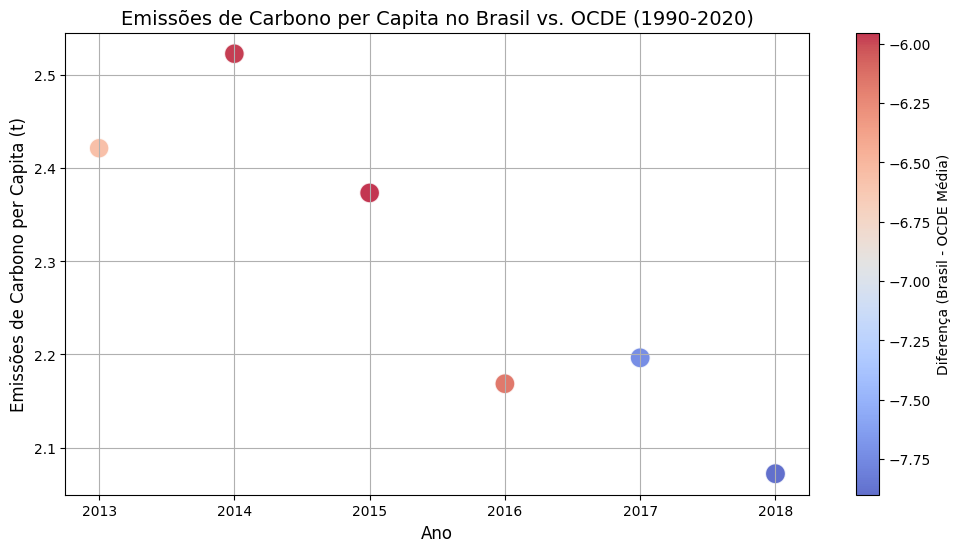

In [69]:
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    x=brazil_oecd["year"],  # Eixo X: Anos
    y=brazil_oecd["Brazil Emissions"],  # Eixo Y: Emissões do Brasil
    c=brazil_oecd["Brazil Emissions"] - brazil_oecd["OCDE Avg Emissions"],  # Diferença de emissões
    s=brazil_oecd["Brazil Population"] / 1e6,  # Tamanho proporcional à população (em milhões)
    cmap="coolwarm",  # Colormap
    alpha=0.8,  # Transparência
    edgecolors="w"  # Borda branca nos pontos
)

# Adicionar barra de cores para mostrar a diferença Brasil-OCDE
cbar = plt.colorbar(scatter)
cbar.set_label("Diferença (Brasil - OCDE Média)")

# Configurar rótulos e título
plt.title("Emissões de Carbono per Capita no Brasil vs. OCDE (1990-2020)", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Emissões de Carbono per Capita (t)", fontsize=12)
plt.grid(True)

# Mostrar o gráfico
plt.show()

## Descrição do Gráfico

O gráfico apresenta as **emissões de carbono per capita** do **Brasil** em comparação com a média dos países da **OCDE** entre os anos de **2013 a 2018**. O gráfico é um scatter plot com quatro dimensões:

## Dimensões do Gráfico

1. **Eixo X (Ano)**:
   - Representa o período de 2013 a 2018.

2. **Eixo Y (Emissões de Carbono per Capita)**:
   - Exibe as emissões do Brasil em toneladas por pessoa.

3. **Cor (Diferença entre Brasil e OCDE)**:
   - Representa a diferença entre as emissões do Brasil e a média da OCDE.
   - Gradiente de cores:
     - Vermelho: O Brasil emite mais carbono per capita em relação à OCDE.
     - Azul: O Brasil emite menos carbono per capita.

4. **Tamanho dos pontos (População do Brasil)**:
   - O tamanho dos pontos é proporcional à população do Brasil (em milhões).

## Observações do Gráfico

1. **Tendência de Emissões do Brasil**:
   - As emissões per capita do Brasil mostram uma leve **tendência de redução** de 2013 a 2018, caindo de aproximadamente **2.4 t/pessoa** em 2013 para **2.1 t/pessoa** em 2018.

2. **Diferença em relação à OCDE**:
   - Os tons azulados indicam que as emissões do Brasil foram consistentemente **menores** do que a média da OCDE durante o período.
   - A diferença em 2018 foi maior (tons mais azulados), sugerindo um maior distanciamento das emissões médias da OCDE.

3. **Variação na População do Brasil**:
   - O tamanho dos pontos permanece estável, sugerindo que não houve uma variação significativa na população durante o período.

## Interpretação

- O Brasil apresenta emissões de carbono per capita significativamente menores do que a média dos países da OCDE entre 2013 e 2018.
- A redução contínua das emissões no Brasil pode estar associada a políticas ambientais, mudanças no perfil energético ou reduções em atividades econômicas de alto impacto ambiental.
- A diferença crescente em relação à OCDE pode indicar que as emissões nos países da OCDE permaneceram estáveis ou até aumentaram, enquanto o Brasil seguiu uma tendência de redução.

# Pergunta 3: Classificação das Emissões Totais de Carbono

### Questão de Pesquisa:
Qual é a classificação das emissões totais de carbono entre **Brasil**, **EUA**, **continente americano**, **OCDE**, e **mundo**, identificando os maiores e menores emissores?

### Descrição do que será feito:
Nesta atividade, realizaremos as seguintes etapas para responder à questão de pesquisa:

1. **Cálculo das emissões totais**:
   - Somar as emissões de carbono de cada grupo (Brasil, EUA, continente americano, OCDE e mundo) com base nos dados disponíveis.

2. **Classificação dos grupos**:
   - Ordenar os grupos em ordem decrescente de emissões totais de carbono, para identificar o maior e o menor emissor.

3. **Visualização com gráfico de barras**:
   - Criar um gráfico de barras que apresente de forma clara as emissões totais de carbono para cada grupo.

Calcular as emissões totais de carbono para cada grupo usando os DataFrames existentes

In [73]:
# Brasil
brazil_total = brazil_data['value'].sum()

# Continente americano
americas_total = american_data['value'].sum()

# EUA
usa_total = usa_data['value'].sum()

# OCDE
oecd_total = oecd_data['value'].sum()

# Dados globais
world_total = global_data['value'].sum()

Criar DataFrame com os resultados

In [74]:
classification = pd.DataFrame({
    "Group": ["Brazil", "Americas", "United States", "OECD", "World"],
    "Total Emissions": [brazil_total, americas_total, usa_total, oecd_total, world_total]
})

Ordenar em ordem decrescente

In [75]:
classification = classification.sort_values(by="Total Emissions", ascending=False)

Redefinir o índice para o grupo

In [76]:
classification.reset_index(drop=True, inplace=True)

Exibir classificação

In [77]:
print("\nClassificação das emissões totais de carbono:")
from IPython.display import display
display(classification)


Classificação das emissões totais de carbono:


,Group,Total Emissions
0,World,1501.895713
1,OECD,1267.761966
2,Americas,418.990366
3,United States,334.469873
4,Brazil,13.755365


Visualizar com gráfico de barras

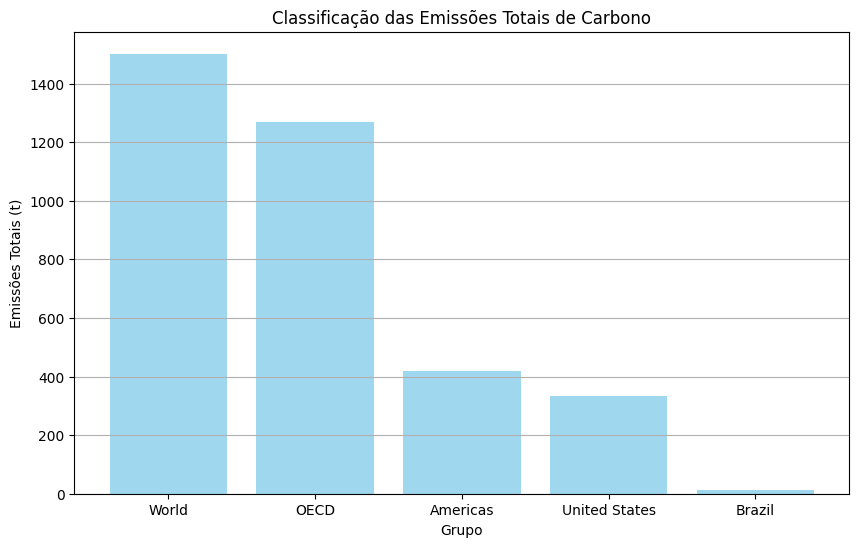

In [78]:
plt.figure(figsize=(10, 6))
plt.bar(classification["Group"], classification["Total Emissions"], color="skyblue", alpha=0.8)
plt.title("Classificação das Emissões Totais de Carbono")
plt.xlabel("Grupo")
plt.ylabel("Emissões Totais (t)")
plt.grid(axis="y")
plt.show()


## Classificação das Emissões Totais de Carbono

### Descrição do Gráfico

O gráfico de barras acima apresenta a **classificação das emissões totais de carbono** entre os grupos analisados: **Brasil**, **EUA**, **continente americano**, **OCDE** e o **mundo**. As emissões foram somadas para cada grupo e ordenadas em ordem decrescente.

### Observações:
1. **Mundo (World)**:
   - O maior emissor de carbono, com um total de aproximadamente **1501,90 t**.
   - Representa as emissões globais combinadas.

2. **OCDE (OECD)**:
   - O segundo maior emissor, com um total de aproximadamente **1267,76 t**.
   - Inclui os países membros da OCDE.

3. **Continente Americano (Americas)**:
   - Aparece em terceiro lugar, com emissões totais de cerca de **418,99 t**.
   - Representa a soma das emissões de todos os países do continente americano.

4. **Estados Unidos (United States)**:
   - O maior emissor individual entre os grupos analisados, com emissões totais de aproximadamente **334,47 t**.

5. **Brasil (Brazil)**:
   - O menor emissor entre os grupos analisados, com um total de apenas **13,75 t**, destacando-se como um emissor significativamente menor em relação aos outros grupos.

### Interpretação

- O **mundo** lidera as emissões devido à soma de todos os países.
- A **OCDE**, sendo composta por economias desenvolvidas, contribui significativamente para as emissões globais.
- Os **Estados Unidos** são o maior emissor entre os países individuais, refletindo seu impacto global em emissões.
- O **Brasil** apresenta emissões significativamente menores, destacando-se como um país com menor impacto relativo.

### Considerações:

Este gráfico permite identificar os maiores e menores emissores de carbono de forma clara, auxiliando na priorização de esforços para redução de emissões em nível global e regional.

# Pergunta 4: Tendência da Pegada de Carbono do Brasil (Últimos 10 Anos)

#### Descrição do que será feito
Neste trecho da análise, iremos:
1. Filtrar os dados relacionados às emissões de carbono no Brasil para os últimos 10 anos.
2. Ordenar os dados por ano para identificar a tendência temporal.
3. Gerar um gráfico para visualizar o comportamento histórico da pegada de carbono (em toneladas per capita) no Brasil.

O objetivo é determinar se as emissões aumentaram, diminuíram ou permaneceram constantes.

Transformar o carbon_data para o formato longo

In [80]:
carbon_data.rename(columns={'Country Name': 'country'}, inplace=True)
carbon_data_long = pd.melt(
    carbon_data,
    id_vars=['country', 'country_code', 'Region', 'Indicator Name'],
    var_name='year',
    value_name='value'
)
carbon_data_long['year'] = pd.to_numeric(carbon_data_long['year'], errors='coerce')


Filtrar os dados do Brasil

In [81]:
brazil_carbon_data = carbon_data_long[
    (carbon_data_long["country"] == "Brazil") &
    (carbon_data_long["year"] >= 2013)  # Últimos 10 anos (ajuste para o ano atual, se necessário)
]

Ordenar os dados por ano para garantir a sequência correta

In [82]:
brazil_carbon_data = brazil_carbon_data.sort_values("year")

Criar o gráfico da tendência de emissões de carbono no Brasil

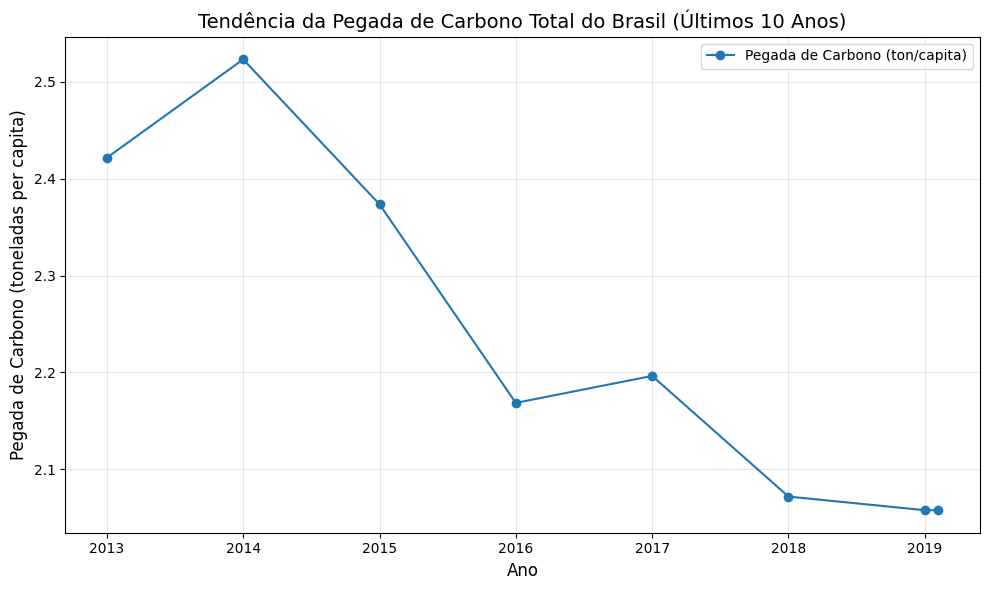

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(brazil_carbon_data["year"], brazil_carbon_data["value"], marker="o", label="Pegada de Carbono (ton/capita)")
plt.title("Tendência da Pegada de Carbono Total do Brasil (Últimos 10 Anos)", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Pegada de Carbono (toneladas per capita)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#### Observações sobre o resultado

Com base no gráfico gerado para a tendência da pegada de carbono total do Brasil nos últimos 10 anos:

- A **pegada de carbono per capita** do Brasil apresentou uma **tendência decrescente** ao longo do período analisado.
- O valor máximo foi observado em **2014**, atingindo aproximadamente **2.5 toneladas per capita**, seguido por uma queda significativa até **2016**.
- Entre **2016 e 2017**, houve um leve aumento, mas as emissões continuaram a diminuir até estabilizarem em torno de **2.1 toneladas per capita** em **2018 e 2019**.

# Pergunta 5: Como a pegada de carbono do Brasil se compara à média global ao longo dos últimos anos?

#### Descrição do que será feito
1. Calcular a média global da pegada de carbono (toneladas per capita) para cada ano no período disponível.
2. Comparar os valores da pegada de carbono do Brasil com a média global para os mesmos anos.
3. Visualizar os resultados em um gráfico para facilitar a interpretação.

Calcular a média global da pegada de carbono

In [87]:
global_average = carbon_data_long.groupby("year")["value"].mean().reset_index()
global_average.rename(columns={"value": "global_avg"}, inplace=True)

Filtrar os dados do Brasil

In [88]:
brazil_data_comparison = carbon_data_long[carbon_data_long["country"] == "Brazil"]

Combinar os dados do Brasil com a média global

In [89]:
comparison_data = pd.merge(brazil_data_comparison, global_average, on="year", how="inner")

Criar o gráfico comparativo

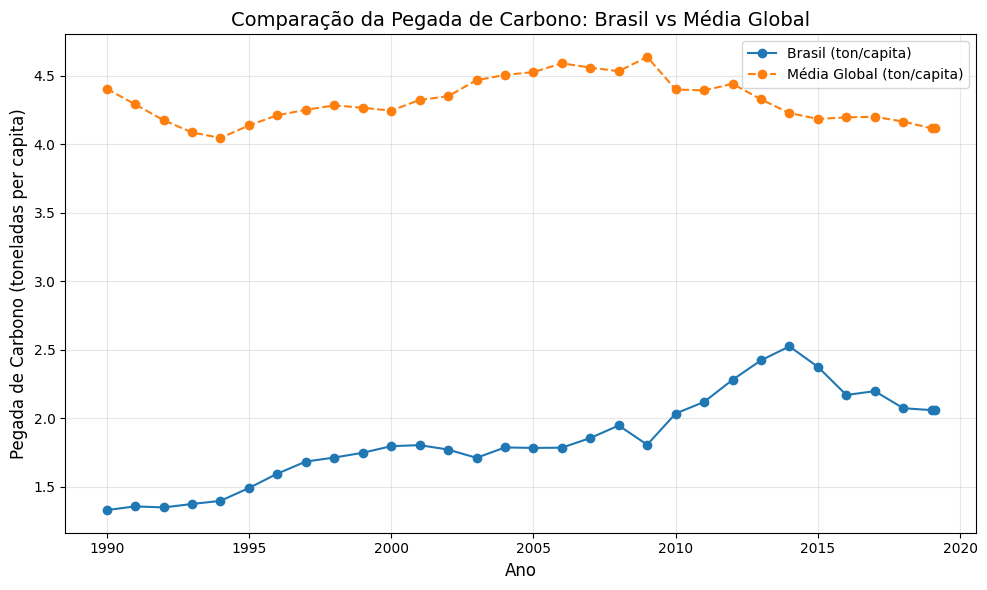

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(comparison_data["year"], comparison_data["value"], marker="o", label="Brasil (ton/capita)")
plt.plot(comparison_data["year"], comparison_data["global_avg"], marker="o", label="Média Global (ton/capita)", linestyle="--")
plt.title("Comparação da Pegada de Carbono: Brasil vs Média Global", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Pegada de Carbono (toneladas per capita)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#### Observações sobre o resultado

Com base no gráfico gerado:

- A **pegada de carbono per capita do Brasil** é consistentemente **inferior** à média global ao longo de todo o período analisado.
- Enquanto a média global de emissões de carbono por pessoa permanece em torno de **4.5 toneladas por ano**, as emissões do Brasil ficam entre **1.5 e 2.5 toneladas por pessoa**.
- O **Brasil apresenta um aumento gradual nas emissões até 2014**, seguido por uma tendência de redução nos anos mais recentes, enquanto a média global apresenta relativa estabilidade, com uma leve redução após 2010.

# Pergunta 6: Distribuição das Emissões de Carbono per Capita entre os Países da OCDE

### Questão de Pesquisa:
Como estão distribuídas as emissões de carbono per capita entre os países da OCDE?

### Descrição do que será feito:
Nesta atividade, realizaremos as seguintes etapas para responder à questão de pesquisa:

1. **Preparação dos dados**:
   - Utilizar o conjunto de dados da OCDE (`oecd_data`) para filtrar as emissões de carbono per capita de cada país.

2. **Construção do histograma**:
   - Criar um histograma que mostre a frequência das emissões por intervalo.
   - Adicionar uma curva de densidade (`kde`) para suavizar a visualização e identificar padrões.

3. **Análise da distribuição**:
   - Analisar os intervalos mais frequentes de emissões per capita entre os países da OCDE.
   - Identificar padrões, como concentração em faixas específicas ou agrupamentos significativos.

O objetivo é explorar a distribuição das emissões de carbono per capita entre os países da OCDE e entender se há diferenças significativas entre eles.


Configurar o histograma para emissões per capita

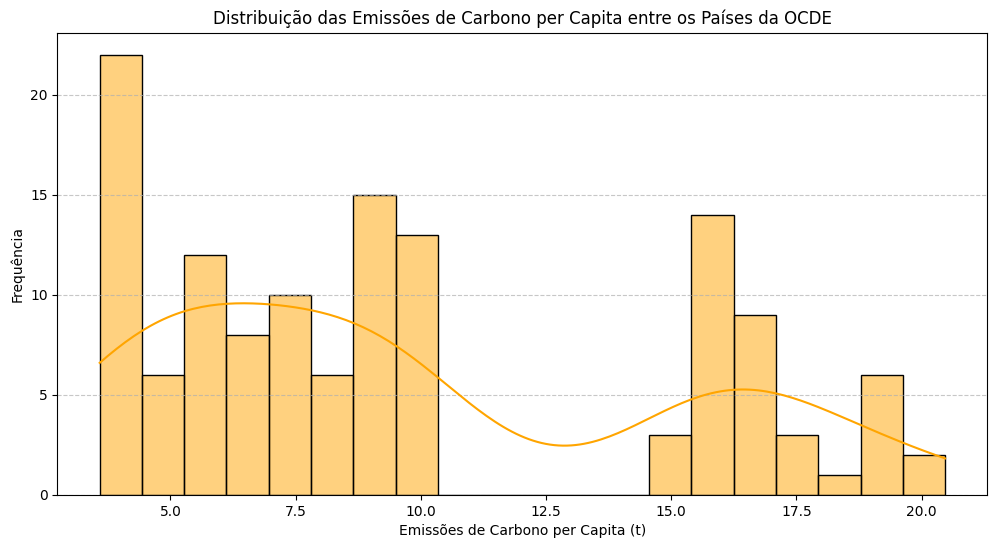

In [96]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=oecd_data,
    x='value',  # Emissões per capita
    bins=20,  # Número de intervalos
    kde=True,  # Adicionar linha de densidade
    color='orange'
)

# Configurações do gráfico
plt.title("Distribuição das Emissões de Carbono per Capita entre os Países da OCDE")
plt.xlabel("Emissões de Carbono per Capita (t)")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()

## Distribuição das Emissões de Carbono per Capita entre os Países da OCDE

### Descrição do Gráfico

O histograma acima apresenta a **distribuição das emissões de carbono per capita** entre os países da OCDE. Ele foi construído com base nos dados disponíveis e mostra a frequência das emissões por intervalos.

### Observações:

1. **Faixas de Emissões Mais Frequentes**:
   - A maioria dos países apresenta emissões entre **5 t** e **7.5 t** por pessoa.
   - Outro pico de frequência ocorre entre **15 t** e **17.5 t** por pessoa.

2. **Curva de Densidade (KDE)**:
   - A curva suavizada indica como os valores se distribuem no conjunto de dados.
   - Existem dois agrupamentos principais de emissões: um entre **5 t - 7.5 t** e outro em torno de **15 t - 17.5 t**.

3. **Distribuição Geral**:
   - A distribuição parece **bimodal**, sugerindo que os países da OCDE podem ser divididos em dois grupos principais:
     - Um grupo com emissões mais baixas (cerca de **5 t - 7.5 t**).
     - Outro grupo com emissões significativamente mais altas (acima de **15 t**).

### Interpretação

Este gráfico ajuda a identificar padrões nas emissões de carbono per capita entre os países da OCDE. Ele destaca como as emissões não são uniformemente distribuídas, com concentrações em dois intervalos principais. Essa análise pode ser útil para identificar grupos de países com características semelhantes em termos de emissões.


# Pergunta 7: Projeção da Pegada de Carbono no Brasil para os Próximos 10 Anos

#### Descrição do que será feito
Nesta etapa da análise, será utilizado um modelo de **regressão linear** para prever a pegada de carbono per capita no Brasil para os próximos 10 anos (2025-2034). O modelo será treinado com os dados históricos de emissões de carbono desde **1990**. O objetivo é entender a tendência futura das emissões e fazer projeções para os próximos anos.

As etapas envolvem:
1. Filtrar os dados de emissões de carbono para o Brasil desde **1990**.
2. Treinar um modelo de **regressão linear** utilizando o ano como variável independente e a pegada de carbono per capita como variável dependente.
3. Realizar a **previsão** da pegada de carbono para os próximos **10 anos**.
4. **Visualizar os resultados históricos** e as **previsões futuras** em um gráfico para facilitar a interpretação dos dados.

O modelo de regressão será avaliado utilizando o **erro médio quadrático (MSE)** e, em seguida, as previsões serão feitas para os anos futuros.

#### Objetivo
O objetivo dessa atividade é projetar a pegada de carbono no Brasil, com base em dados históricos, para os próximos 10 anos e identificar a tendência futura das emissões.

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Filtrar os dados para o Brasil desde 1990

In [101]:
brazil_data = carbon_data_long[(carbon_data_long["country"] == "Brazil") & (carbon_data_long["year"] >= 1990)]

Usar 'year' como variável independente e 'value' (pegada de carbono) como variável dependente

In [102]:
X_brazil = brazil_data[['year']]
y_brazil = brazil_data['value']

Dividir os dados em treino (70%) e teste (30%)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_brazil, y_brazil, test_size=0.3, random_state=42)

Treinar o modelo de Regressão Linear

In [104]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Fazer previsões com o modelo nos dados de teste

In [105]:
y_pred = regressor.predict(X_test)

Calcular o erro médio quadrático (MSE)

In [106]:
mse = mean_squared_error(y_test, y_pred)


Prever a pegada de carbono para os próximos 10 anos (2025-2034)

In [107]:
future_years = pd.DataFrame({'year': np.arange(2025, 2035)})  # Criar um DataFrame com os anos futuros

Fazer a previsão para os próximos anos

In [108]:
future_predictions = regressor.predict(future_years)

Plotar os resultados históricos e as previsões futuras

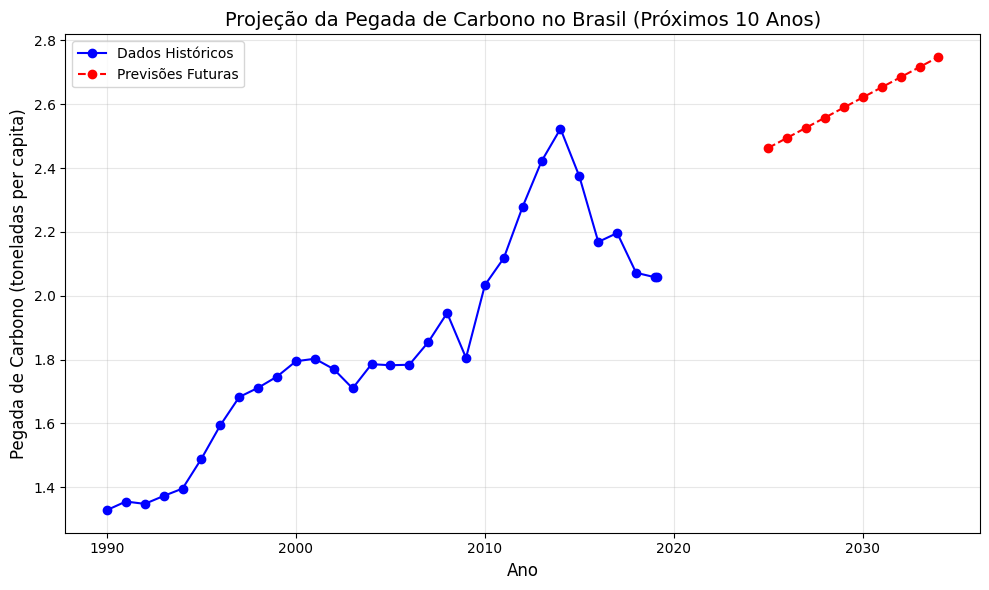

In [109]:
plt.figure(figsize=(10, 6))
plt.plot(brazil_data['year'], brazil_data['value'], label="Dados Históricos", color='blue', marker='o')
plt.plot(future_years['year'], future_predictions, label="Previsões Futuras", color='red', linestyle='--', marker='o')
plt.title("Projeção da Pegada de Carbono no Brasil (Próximos 10 Anos)", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Pegada de Carbono (toneladas per capita)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#### Observações sobre o resultado

Com base no gráfico gerado para a **projeção da pegada de carbono no Brasil** para os próximos 10 anos (2025-2034):

- **Dados Históricos (azul):** A pegada de carbono per capita no Brasil mostrou uma **tendência crescente** desde 1990 até o início dos anos 2010, com um **pico** em torno de 2014, atingindo cerca de **2.5 toneladas per capita**. Depois, houve uma queda, que se estabilizou em torno de **2.0 toneladas per capita** na última década.
  
- **Previsões Futuras (vermelho):** As previsões para os próximos **10 anos** indicam uma **continuação do aumento gradual** da pegada de carbono. Esse aumento, embora modesto, sugere que as emissões podem atingir um valor ligeiramente superior a **2.7 toneladas per capita** até **2034**.

### **Possíveis explicações para essa tendência:**
- **Crescimento econômico e aumento no uso de combustíveis fósseis:** O aumento das emissões pode estar associado a **expansão econômica**, uso crescente de **energia não renovável** e aumento de atividades industriais e agrícolas.
- **Mudanças políticas e tecnológicas:** Se novas políticas ambientais mais eficazes forem implementadas, as previsões podem ser ajustadas para um crescimento mais moderado.

#### Considerações adicionais:
- A projeção mostra uma **tendência contínua** no aumento das emissões, mas pode ser influenciada por fatores externos como políticas públicas, transição energética, ou mudanças nos padrões de consumo.
- A análise futura pode ser aprimorada com dados mais detalhados, como o impacto de novas políticas de sustentabilidade ou uso de fontes de energia renovável.

Este gráfico oferece uma visão clara do comportamento histórico e das previsões futuras da pegada de carbono no Brasil, fornecendo uma base para discutir ações para mitigar o impacto ambiental.

# Pergunta 8: Relação entre as Emissões de Carbono do Brasil e da OCDE

### Questão de Pesquisa:
Como as emissões de carbono do Brasil se relacionam com as emissões médias da OCDE ao longo dos anos?

---

### Descrição do que será feito:
Nesta atividade, realizaremos as seguintes etapas para responder à questão de pesquisa:

1. **Preparação dos dados**:
   - Utilizar os dados de emissões per capita do Brasil (`brazil_data`) e da OCDE (`oecd_data`).
   - Agrupar os dados da OCDE por ano para calcular a média de emissões per capita.

2. **Combinação de dados**:
   - Unir os dados do Brasil e da OCDE em um único DataFrame para permitir a comparação ao longo dos anos.

3. **Construção do gráfico de correlação**:
   - Criar um gráfico de dispersão que mostra as emissões do Brasil em relação às médias da OCDE.
   - Adicionar uma linha de tendência (regressão linear) para identificar a correlação entre as duas variáveis.

4. **Análise do padrão**:
   - Avaliar se há uma correlação positiva, negativa ou neutra entre as emissões do Brasil e da OCDE.

O objetivo é explorar a relação entre as emissões de carbono do Brasil e da OCDE, analisando se seguem tendências similares ao longo do tempo.


In [111]:
import seaborn as sns

Filtrar os dados necessários

In [112]:
brazil_emissions = brazil_data[['year', 'value']].rename(columns={"value": "Brazil Emissions"})
oecd_emissions = oecd_data.groupby('year')['value'].mean().reset_index().rename(columns={"value": "OECD Emissions"})

Combinar os dados do Brasil e da OCDE por ano

In [113]:
comparison_data = pd.merge(brazil_emissions, oecd_emissions, on="year", how="inner")

Criar gráfico de correlação

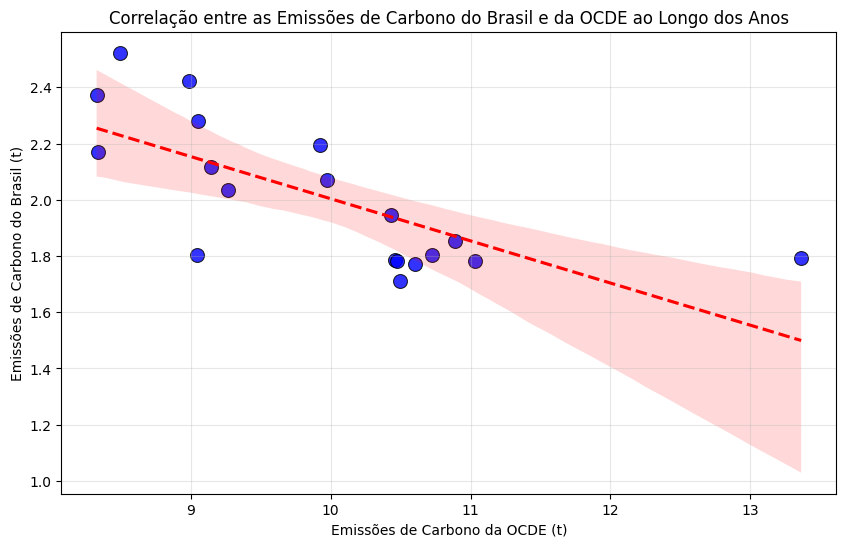

In [114]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=comparison_data['OECD Emissions'],
    y=comparison_data['Brazil Emissions'],
    color='blue',
    s=100,
    alpha=0.8,
    edgecolor='black'
)

# Adicionar linha de tendência (correlação)
sns.regplot(
    x=comparison_data['OECD Emissions'],
    y=comparison_data['Brazil Emissions'],
    scatter=False,
    color='red',
    line_kws={"linestyle": "dashed"}
)

# Configurações do gráfico
plt.title("Correlação entre as Emissões de Carbono do Brasil e da OCDE ao Longo dos Anos")
plt.xlabel("Emissões de Carbono da OCDE (t)")
plt.ylabel("Emissões de Carbono do Brasil (t)")
plt.grid(alpha=0.3)
plt.show()

## Correlação entre as Emissões de Carbono do Brasil e da OCDE ao Longo dos Anos

### Descrição do Gráfico

O gráfico acima apresenta a **correlação entre as emissões de carbono per capita do Brasil e a média das emissões per capita da OCDE** ao longo dos anos.

### Observações:

1. **Relação entre as variáveis**:
   - Existe uma **correlação negativa** entre as emissões de carbono do Brasil e as da OCDE.
   - Isso indica que, à medida que as emissões da OCDE aumentam, as emissões do Brasil tendem a diminuir (e vice-versa).

2. **Linha de tendência (regressão linear)**:
   - A linha vermelha pontilhada representa a tendência geral, mostrando que o Brasil segue um padrão oposto ao da OCDE em relação às emissões per capita.
   - A sombra ao redor da linha representa o intervalo de confiança da regressão.

3. **Distribuição dos pontos**:
   - Os pontos azuis indicam os valores das emissões do Brasil em relação à OCDE para cada ano.
   - A maior parte dos pontos está concentrada na faixa de emissões per capita da OCDE entre **9 t** e **12 t**.

### Interpretação:

- O Brasil tem emissões per capita **consistentemente menores** do que a média da OCDE.
- A **correlação negativa** sugere que os padrões de emissões do Brasil e da OCDE não seguem tendências similares, indicando diferenças estruturais nas fontes de emissão ou políticas ambientais.
- Este gráfico pode ser usado para destacar como as emissões do Brasil são menos dependentes das tendências gerais dos países da OCDE.

# Pergunta 9: As emissões de carbono per capita do Brasil são mais próximas às dos EUA ou da média global?

#### Descrição do que será feito:
- Calcular as médias das emissões de carbono per capita tanto para o Brasil, quanto para os EUA e a média global.
- Comparar as emissões de carbono do Brasil com as dos EUA e com a média global, analisando qual das duas é mais semelhante.
- Visualizar a comparação das emissões de carbono do Brasil, dos EUA e da média global em um gráfico.
#### Objetivo:
- Determinar se as emissões de carbono do Brasil estão mais alinhadas com as dos EUA ou com a média global, e entender como o Brasil se posiciona em termos de pegada de carbono comparado a essas duas referências.

Filtrar os dados para o Brasil, EUA e média global

In [116]:
brazil_data_comparison = carbon_data_long[carbon_data_long["country"] == "Brazil"]
usa_data_comparison = carbon_data_long[carbon_data_long["country"] == "United States"]
global_data_comparison = carbon_data_long.groupby("year")["value"].mean().reset_index()
global_data_comparison.rename(columns={"value": "global_avg"}, inplace=True)

Calcular as médias das emissões per capita para o Brasil, EUA e Média Global por ano

In [117]:
brazil_avg_per_capita = brazil_data_comparison.groupby("year")["value"].mean().reset_index()
usa_avg_per_capita = usa_data_comparison.groupby("year")["value"].mean().reset_index()

Combinar os dados para comparações

In [118]:
comparison_data = pd.merge(brazil_avg_per_capita, usa_avg_per_capita, on="year", suffixes=("_brazil", "_usa"))
comparison_data = pd.merge(comparison_data, global_data_comparison, on="year", how="inner")

Criar o gráfico comparativo entre o Brasil, EUA e a média global

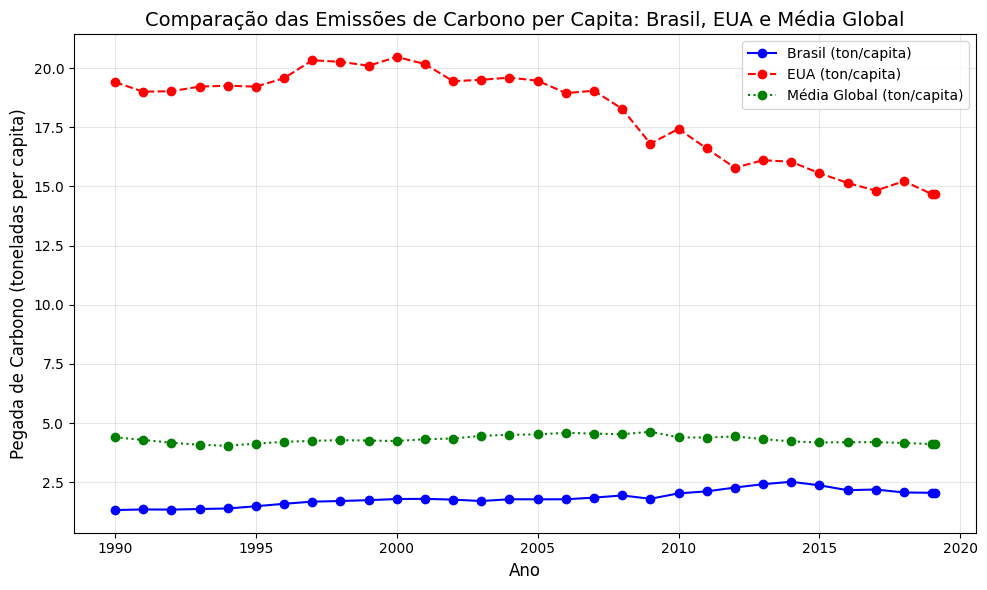

In [119]:
plt.figure(figsize=(10, 6))
plt.plot(comparison_data["year"], comparison_data["value_brazil"], marker="o", label="Brasil (ton/capita)", color='blue')
plt.plot(comparison_data["year"], comparison_data["value_usa"], marker="o", label="EUA (ton/capita)", linestyle="--", color='red')
plt.plot(comparison_data["year"], comparison_data["global_avg"], marker="o", label="Média Global (ton/capita)", linestyle=":", color='green')
plt.title("Comparação das Emissões de Carbono per Capita: Brasil, EUA e Média Global", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Pegada de Carbono (toneladas per capita)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### Observações sobre o resultado

Com base no gráfico gerado para a **comparação das emissões de carbono per capita** entre o **Brasil**, os **EUA** e a **média global**:

- **Emissões do Brasil (azul):** A pegada de carbono per capita do Brasil foi **consistentemente mais baixa** que a dos EUA, permanecendo entre **2.5 e 3.0 toneladas per capita** durante o período analisado. O Brasil apresentou um aumento gradual nas emissões, mas em uma faixa muito mais baixa em comparação com os EUA e a média global. Isso reflete a predominância de fontes de energia **renováveis** no Brasil, como **hidrelétricas**, e um modelo de desenvolvimento que tem menos dependência de atividades industriais de alto carbono.

- **Emissões dos EUA (vermelho):** As emissões per capita dos **EUA** foram **significativamente mais altas**, variando entre **17.5 e 20.0 toneladas per capita** ao longo do período. Embora tenha ocorrido uma **leve queda** nas emissões nos últimos anos, as emissões dos EUA continuam a ser muito mais altas que as do Brasil e da média global. Isso reflete um modelo econômico altamente industrializado, dependente de **combustíveis fósseis**, como petróleo e gás natural.

- **Média Global (verde):** A **média global** das emissões de carbono per capita variou entre **4.5 e 5.5 toneladas per capita** ao longo do período. O gráfico mostra que, enquanto as emissões globais apresentaram uma ligeira **redução** nos últimos anos, a média global se manteve estável em uma faixa superior à do Brasil, mas significativamente inferior à dos EUA.

### **Análise das Diferenças:**
- **Brasil vs EUA:** O Brasil tem uma pegada de carbono **muito mais baixa** que os EUA, o que pode ser explicado pela sua **matriz energética renovável**, com destaque para a energia hidrelétrica, que tem um impacto ambiental muito menor.
- **Brasil vs Média Global:** O Brasil se aproxima mais da **média global** de emissões, o que reflete uma tendência de **emissões mais baixas** em comparação com economias altamente industrializadas. No entanto, o Brasil está **abaixo da média global**, indicando que o país está adotando medidas mais eficazes em termos de sustentabilidade ou possui uma estrutura de emissão menos intensiva.
- **EUA vs Média Global:** A comparação entre os EUA e a média global destaca como os **países desenvolvidos** continuam a ter uma pegada de carbono significativamente mais alta, embora tenha ocorrido uma **redução nas últimas décadas**, possivelmente devido a mudanças no setor energético e políticas ambientais.

#### Considerações Finais:
Este gráfico ilustra a **necessidade de ação** para reduzir ainda mais as emissões, especialmente nos países desenvolvidos, que têm uma pegada de carbono muito mais alta, mesmo que tenha havido melhorias em sua trajetória de emissões.

## Pergunta 10: Relação entre Consumo de Energia Eólica e Emissões de Carbono nos Países da OCDE

### Questão de Pesquisa:
Qual é a relação entre o consumo de energia eólica e as emissões de carbono per capita nos países da OCDE?

### Descrição do que será feito:
Nesta atividade, realizaremos as seguintes etapas para responder à questão de pesquisa:

1. **Preparação dos dados**:
   - Selecionar as colunas relevantes: consumo de energia eólica (`wind_energy_consumption`) e emissões de carbono (`value`).

2. **Construção do gráfico de dispersão**:
   - Criar um gráfico de dispersão com:
     - **Eixo X**: Consumo de energia eólica (TWh).
     - **Eixo Y**: Emissões de carbono (toneladas).
     - Cores diferenciando os países da OCDE.

3. **Análise da relação**:
   - Observar tendências gerais no gráfico, como:
     - Países com maior consumo de energia eólica apresentam menores emissões?
     - Outliers ou padrões inesperados.

O objetivo é identificar possíveis correlações entre o aumento do uso de energia renovável e a redução das emissões de carbono nos países da OCDE.


Filtrar os dados necessários

In [133]:
oecd_energy_carbon = oecd_data[['country', 'wind_electricity', 'value']].dropna()
oecd_energy_carbon.rename(columns={"value": "Carbon Emissions (t)", "wind_electricity": "Wind Energy Consumption (TWh)"}, inplace=True)

Criação do gráfico

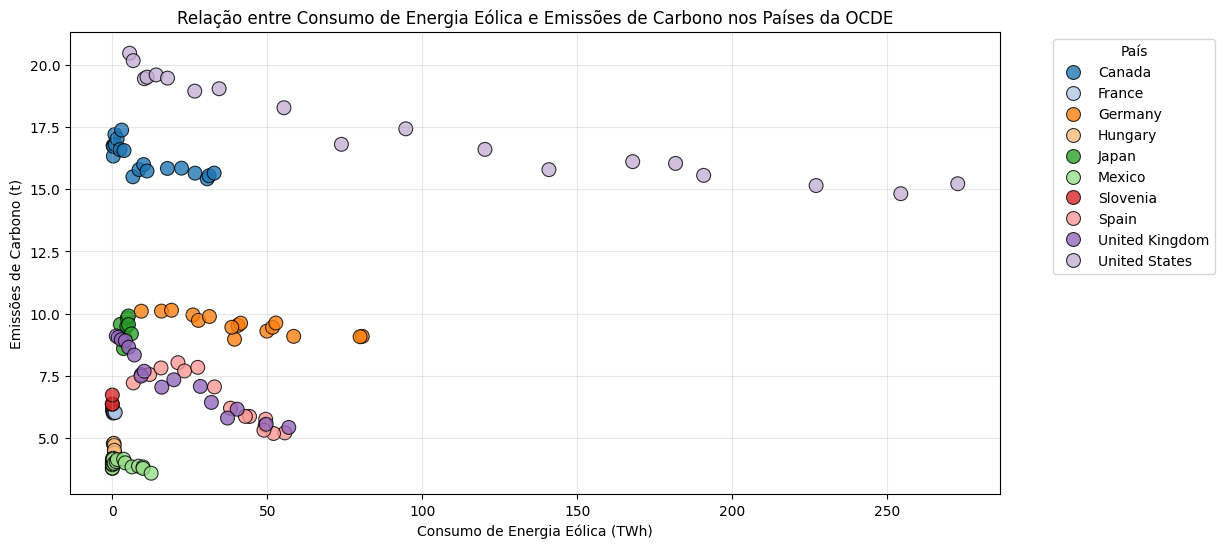

In [135]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=oecd_energy_carbon["Wind Energy Consumption (TWh)"],
    y=oecd_energy_carbon["Carbon Emissions (t)"],
    hue=oecd_energy_carbon["country"],  # Cor por país para identificar
    palette="tab20",
    s=100,
    alpha=0.8,
    edgecolor='black'
)

# Configurações do gráfico
plt.title("Relação entre Consumo de Energia Eólica e Emissões de Carbono nos Países da OCDE")
plt.xlabel("Consumo de Energia Eólica (TWh)")
plt.ylabel("Emissões de Carbono (t)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="País")
plt.grid(alpha=0.3)

# Exibir o gráfico
plt.show()


## Relação entre Consumo de Energia Eólica e Emissões de Carbono nos Países da OCDE

### Descrição do Gráfico

O gráfico acima apresenta a **relação entre o consumo de energia eólica (em TWh)** e as **emissões de carbono per capita (em toneladas)** dos países membros da OCDE.

### Observações:

1. **Distribuição dos países**:
   - Os países estão distribuídos em relação ao seu consumo de energia eólica e suas emissões de carbono.
   - A maior parte dos países possui baixo consumo de energia eólica (próximo a 0 TWh) e apresenta emissões variando entre **5 t** e **10 t**.

2. **Consumo elevado de energia eólica**:
   - Poucos países apresentam consumo elevado de energia eólica, com destaque para valores acima de **100 TWh**.
   - Esses países, como os Estados Unidos, possuem emissões de carbono variando entre **10 t** e **20 t**.

### Interpretação:

- **Baixo consumo de energia eólica**:
  - A maioria dos países da OCDE ainda depende de fontes de energia não renováveis, como carvão e gás natural, refletido em emissões per capita elevadas.
  
- **Tendência geral**:
  - Países com maior consumo de energia eólica tendem a ter emissões de carbono mais diversificadas, sugerindo que a transição para energia renovável pode ser complementada por outras políticas ambientais para impactar significativamente as emissões.